In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tracks.csv', skiprows=1, index_col=0, engine='python', error_bad_lines=False)

Skipping line 53396: unexpected end of data


In [44]:
tracks = df.copy()

Remove all observations missing a top genre value

In [45]:
tracks = tracks.dropna(subset=['genre_top'])

Ordinally encode the target column ('genre_top')

In [46]:
import category_encoders as ce

cat_encoder = ce.OrdinalEncoder(return_df=False)
tracks['genre_top_encoded'] = cat_encoder.fit_transform(tracks['genre_top'])


In [47]:
X = tracks.drop(columns=['genre_top', 'genre_top_encoded', 'id', 'id.1', 'genres', 'genres_all'], axis=1)
y = tracks['genre_top_encoded']
X.shape, y.shape

((28426, 47), (28426,))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Ordinal Encode the Producer Feature

In [49]:
X_train['producer'].nunique()

313

In [50]:
X_train['producer'].isnull().sum()

17646

In [51]:
cat_encoder = ce.OrdinalEncoder(return_df=False, handle_missing='value', handle_unknown='value')
cat_encoder = cat_encoder.fit(X_train['producer'])
X_train.loc[:,'producer'] = cat_encoder.transform(X_train.loc[:,'producer'])
X_test.loc[:,'producer'] = cat_encoder.transform(X_test.loc[:,'producer'])

## Ordinal Encode Type 

In [56]:
X_train['type'].nunique()

4

In [57]:
X_train['type'].value_counts()

Album               16936
Radio Program        2762
Live Performance     1937
Single Tracks         390
Name: type, dtype: int64

In [58]:
cat_encoder = ce.OrdinalEncoder(return_df=False, handle_missing='value', handle_unknown='value')
cat_encoder = cat_encoder.fit(X_train['type'])
X_train.loc[:,'type'] = cat_encoder.transform(X_train.loc[:,'type'])
X_test.loc[:,'type'] = cat_encoder.transform(X_test.loc[:,'type'])

In [59]:
cat_encoder.inverse_transform(X_train.loc[:,'type'])

array([['Album'],
       ['Album'],
       ['Radio Program'],
       ...,
       ['Album'],
       ['Album'],
       ['Album']], dtype=object)

## Ordinal Encode Location Feature

In [60]:
X_train['location'].nunique()

1037

In [61]:
X_train['location'].describe()

count            14684
unique            1037
top       Brooklyn, NY
freq               829
Name: location, dtype: object

In [62]:
X_train['location'].isnull().sum()

8056

In [63]:
loc_encoder = ce.OrdinalEncoder(return_df=False, handle_missing='value', handle_unknown='value')
loc_encoder = loc_encoder.fit(X_train['location'])
X_train.loc[:,'location'] = loc_encoder.transform(X_train.loc[:,'location'])
X_test.loc[:,'location'] = loc_encoder.transform(X_test.loc[:,'location'])

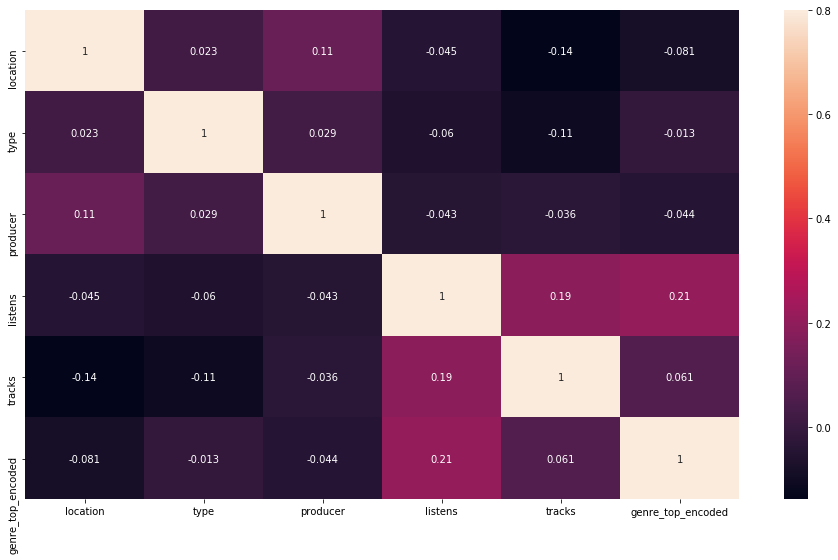

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['location', 'type','producer', 'listens', 'tracks']

temp = pd.concat([X_train[features], y_train], axis=1)
corrmat = temp.corr()
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(corrmat, annot=True, vmax=0.8, square=False)
plt.show()

## Logistic Regression Attempt with additional features

In [69]:
from sklearn.linear_model import LogisticRegression

In [74]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto')
log_reg = log_reg.fit(X_train[features], y_train)


score = log_reg.score(X_train[features], y_train)
print('Train Accuracy Score:', score)
score = log_reg.score(X_test[features], y_test)
print('Train Accuracy Score:', score)

Train Accuracy Score: 0.2804749340369393
Train Accuracy Score: 0.28139289482940555


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Substantially better than the baseline model built (test accuracy of ~.17)

In [ ]:
X_train['composer']

## Encode the composer, lyricist, and publisher columns

In [75]:
X_train['composer'].nunique()

214

In [83]:
X_train['composer'].isnull().sum()

21863

In [84]:
X_train.shape

(22740, 47)

In [78]:
composer_hasher = ce.HashingEncoder()
composer_hasher = composer_hasher.fit(X_train['composer'])
composer_train = composer_hasher.transform(X_train.loc[:,'composer'])
composer_test = composer_hasher.transform(X_test.loc[:,'composer'])